# PlasmaPy Tutorial

[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html
[`plasmapy.particles`]: https://docs.plasmapy.org/en/stable/particles/index.html
[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html
[`plasmapy.dispersion`]: https://docs.plasmapy.org/en/stable/dispersion/index.html

PlasmaPy is an open source Python package for plasma research and education. After a brief recap of [`astropy.units`], this tutorial will cover [`plasmapy.particles`], [`plasmapy.formulary`], and [`plasmapy.dispersion`].

Let's start with some preliminaries. To execute a cell in a Jupyter notebook, press Shift + Enter.

In [1]:
import numpy as np
import astropy.units as u
from astropy import constants as const
import matplotlib.pyplot as plt

from plasmapy.particles import *
from plasmapy.formulary import *
from plasmapy.formulary.radiation import *
from plasmapy.formulary import magnetostatics
from plasmapy.plasma.sources import Plasma3D

from astropy.visualization import quantity_support
quantity_support()

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline
%config InlineBackend.figure_formats = ['svg'] 

## Quick review of Astropy units

[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html

PlasmaPy makes heavy use of [`astropy.units`].  We'll start with a brief review of `astropy.units` for anyone who wasn't able to make it to yesterday's Astropy tutorial. We typically import this subpackage as `u`.

In [2]:
import astropy.units as u

We can create a physical quantity by multiplying or dividing a number or array with a unit.

In [3]:
60 * u.km

<Quantity 60. km>

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

This operation creates a [`Quantity`]: a number, sequence, or array that has been assigned a physical unit.  We can create [`Quantity`] objects with compound units.

In [4]:
V = 88 * u.imperial.mile / u.hour
print(V)

88.0 mi / h


Operations between `Quantity` objects handle unit conversions automatically. We can add `Quantity` objects together as long as their units have the same physical type.

In [5]:
1 * u.m + 25 * u.cm

<Quantity 1.25 m>

Units get handled automatically during operations like multiplication, division, and exponentiation.

In [6]:
(2 * u.m) ** 3

<Quantity 8. m3>

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`to()`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.to

The [`to()`] method allows us to convert a [`Quantity`] to different units of the same physical type. This method accepts strings that represent a unit (including compound units) or a unit object.

In [7]:
V.to("m/s")

<Quantity 39.33952 m / s>

In [8]:
V.to(u.m / u.s)

<Quantity 39.33952 m / s>

[electron-volt]: https://en.wikipedia.org/wiki/Electronvolt
[Boltzmann constant]: https://en.wikipedia.org/wiki/Boltzmann_constant
[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html
[equivalencies]: https://docs.astropy.org/en/stable/units/equivalencies.html
[`temperature_energy()`]: https://docs.astropy.org/en/stable/units/equivalencies.html#temperature-energy-equivalency

Plasma scientists often use the [electron-volt] (eV) as a unit of temperature. This is a shortcut for describing the thermal energy per particle, or more accurately the temperature multiplied by the [Boltzmann constant], $k_B$. 

Because an electron-volt is a unit of energy rather than temperature, we cannot directly convert electron-volts to kelvin. To handle non-standard unit conversions, [`astropy.units`] allows the use of [equivalencies]. The conversion from eV to K can be done by using the [`temperature_energy()`] equivalency.

In [9]:
(1 * u.eV).to("K", equivalencies=u.temperature_energy())

<Quantity 11604.51812155 K>

[`astropy.constants`]: https://docs.astropy.org/en/stable/constants/index.html

[`astropy.constants`] provides access the most commonly needed physical constants.

In [10]:
import astropy.constants as const

In [11]:
const.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

## Particles

[`plasmapy.particles`]: ../../particles/index.rst

The [`plasmapy.particles`] subpackage contains functions to access basic particle data, and classes to represent particles.

In [12]:
from plasmapy.particles import *

### Particle properties

[representation of a particle]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.ParticleLike.html#particlelike

There are several functions that provide information about different particles that might be present in a plasma. The input of these functions is a [representation of a particle], such as a string for the atomic symbol or the element name.

In [13]:
atomic_number("Fe")

26

[atomic number]: https://en.wikipedia.org/wiki/Atomic_number

We can provide a number that represents the [atomic number].

In [14]:
element_name(26)

'iron'

We can also provide standard symbols or the names of particles.

In [15]:
is_stable("e-")

True

In [16]:
charge_number("proton")

1

[alpha particle]: https://en.wikipedia.org/wiki/Alpha_particle

The symbols for many particles can even be used directly, such as for an [alpha particle]. To create an "α" in a Jupyter notebook, type `\alpha` and press tab.

In [17]:
particle_mass("α")

<Quantity 6.64465719e-27 kg>

[mass number]: https://en.wikipedia.org/wiki/Mass_number
[`Quantity`]: https://docs.astropy.org/en/stable/units/quantity.html#quantity
[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html

We can represent isotopes with the atomic symbol followed by a hyphen and the [mass number]. Let's use `half_life` to return the half-life of a radioactive particle in seconds as a [`Quantity`].

In [18]:
half_life("C-14")

<Quantity 1.80825048e+11 s>

We typically represent an ion in a string by putting together the atomic symbol or isotope symbol, a space, the charge number, and the sign of the charge.

In [19]:
charge_number("Fe-56 13+")

13

[particle-like]: https://docs.plasmapy.org/en/latest/glossary.html#term-particle-like

Functions in `plasmapy.particles` are quite flexible in terms of string inputs representing particles. An input is [particle-like] if it can be used to represent a physical particle.  

In [20]:
particle_mass("iron-56 +13")

<Quantity 9.28703048e-26 kg>

In [21]:
particle_mass("iron-56+++++++++++++")

<Quantity 9.28703048e-26 kg>

Most of these functions take additional arguments, with `Z` representing the charge number of an ion and `mass_numb` representing the mass number of an isotope. These arguments are often [keyword-only](https://docs.plasmapy.org/en/latest/glossary.html#term-keyword-only) to avoid ambiguity.

In [22]:
particle_mass("Fe", Z=13, mass_numb=56)

<Quantity 9.28703048e-26 kg>

### Particle objects

[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

Up until now, we have been using functions that accept representations of particles and then return particle properties. With the [`Particle`] class, we can create objects that represent physical particles.

In [23]:
proton = Particle("p+")
electron = Particle("electron")
iron56_nuclide = Particle("Fe", Z=26, mass_numb=56)

Particle properties can be accessed via attributes of the `Particle` class.

In [24]:
proton.mass

<Quantity 1.67262192e-27 kg>

In [25]:
electron.charge

<Quantity -1.60217663e-19 C>

In [26]:
electron.charge_number

-1

In [27]:
iron56_nuclide.binding_energy

<Quantity 7.88686781e-11 J>

#### Antiparticles

We can get antiparticles of fundamental particles by using the `antiparticle` attribute of a `Particle`.

In [28]:
electron.antiparticle

Particle("e+")

[Particle]: ../../api/plasmapy.particles.particle_class.Particle.rst

We can also use the tilde (`~`) operator on a `Particle` to get its antiparticle.

In [29]:
~proton

Particle("p-")

#### Ionization and recombination

The `recombine()` and `ionize()` methods of a `Particle` representing an ion or neutral atom will return a different `Particle` with fewer or more electrons.

In [30]:
deuterium = Particle("D 0+")
deuterium.ionize()

Particle("D 1+")

When provided with a number, these methods tell how many bound electrons to add or remove.

In [31]:
alpha = Particle("alpha")
alpha.recombine(2)

Particle("He-4 0+")

If the ``inplace`` keyword is set to `True`, then the `Particle` will be replaced with the new particle.

In [32]:
argon = Particle("Ar 0+")
argon.ionize(inplace=True)
print(argon)

Ar 1+


### Custom particles

Sometimes we want to use a particle with custom properties.  For example, we might want to represent an average ion in a multi-species plasma.  For that we can use `CustomParticle`.

In [33]:
cp = CustomParticle(9e-26 * u.kg, 2.18e-18 * u.C, symbol="Fe 13.6+")

Many of the attributes of `CustomParticle` are the same as in `Particle`.

In [34]:
cp.mass

<Quantity 9.e-26 kg>

In [35]:
cp.charge

<Quantity 2.18e-18 C>

In [36]:
cp.symbol

'Fe 13.6+'

[`numpy.nan`]: https://numpy.org/doc/stable/reference/constants.html#numpy.nan

If we do not include one of the physical quantities, it gets set to [`numpy.nan`] (not a number) in the appropriate units.

In [37]:
CustomParticle(9.27e-26 * u.kg).charge

<Quantity nan C>

`CustomParticle` objects are not yet able to be used by many of the functions in `plasmapy.formulary`, but are expected to become compatible with them in PlasmaPy 0.8.0 or 0.9.0.



### Particle lists

[`ParticleList`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_collections.ParticleList.html

The [`ParticleList`] class is a container for `Particle` and `CustomParticle` objects.

In [38]:
iron_ions = ParticleList(["Fe 12+", "Fe 13+", "Fe 14+"])

By using a `ParticleList`, we can access the properties of multiple particles at once.

In [39]:
iron_ions.mass

<Quantity [9.27218729e-26, 9.27209620e-26, 9.27200510e-26] kg>

In [40]:
iron_ions.charge

<Quantity [1.92261196e-18, 2.08282962e-18, 2.24304729e-18] C>

In [41]:
iron_ions.symbols

['Fe 12+', 'Fe 13+', 'Fe 14+']

We can also create a `ParticleList` by adding `Particle` and/or `CustomParticle` objects together.

In [42]:
proton + electron

ParticleList(['p+', 'e-'])

We can also get an average particle.

In [43]:
iron_ions.average_particle()

CustomParticle(mass=9.272096197546505e-26 kg, charge=2.0828296241999997e-18 C)

`ParticleList` objects are also expected to become compatible with many functions in `plasmapy.formulary` around PlasmaPy 0.8.0 or 0.9.0.

### Particle categorization

The `categories` attribute of a `Particle` provides a set of the categories that the `Particle` belongs to.

In [44]:
muon = Particle("muon")
muon.categories

{'charged', 'fermion', 'lepton', 'matter', 'unstable'}

The `is_category()` method lets us determine if a `Particle` belongs to one or more categories.

In [45]:
muon.is_category("lepton")

True

If we need to be more specific, we can use the `require` keyword for categories that a `Particle` must belong to, the `exclude` keyword for categories that the `Particle` cannot belong to, and the `any_of` keyword for categories of which a `Particle` needs to belong to at least one.

In [46]:
electron.is_category(require="lepton", exclude="baryon", any_of={"boson", "fermion"})

True

The `valid_categories` attribute of `is_category()` for any `Particle` gives a set containing all valid categories.

In [47]:
print(electron.is_category.valid_categories)

{'actinide', 'antilepton', 'lanthanide', 'post-transition metal', 'stable', 'lepton', 'halogen', 'unstable', 'antibaryon', 'isotope', 'electron', 'matter', 'baryon', 'alkaline earth metal', 'neutrino', 'ion', 'metalloid', 'alkali metal', 'boson', 'fermion', 'proton', 'nonmetal', 'neutron', 'metal', 'positron', 'noble gas', 'uncharged', 'charged', 'antimatter', 'element', 'transition metal', 'antineutrino'}


[`is_category()`]: https://docs.plasmapy.org/en/latest/api/plasmapy.particles.particle_collections.ParticleList.html#plasmapy.particles.particle_collections.ParticleList.is_category

In the next release of PlasmaPy, there will be an [`is_category()`] method on `ParticleList` too.

### Dimensionless particles

[`DimensionlessParticle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.DimensionlessParticle.html
When we need a dimensionless representation of a particle, we can use the [`DimensionlessParticle`] class.

In [48]:
dimensionless_particle = DimensionlessParticle(mass=0.000545, charge=-1)

The properties of dimensionless particles may be accessed by its attributes.

In [49]:
dimensionless_particle.mass

0.000545

In [50]:
dimensionless_particle.charge

-1.0

Because a `DimensionlessParticle` does not uniquely describe a physical particle, it cannot be contained in a `ParticleList`.  

### Nuclear reactions

We can use `plasmapy.particles` to calculate the energy of a nuclear reaction using the `>` operator.  

In [51]:
deuteron = Particle("D+")
triton = Particle("T+")
alpha = Particle("α")
neutron = Particle("n")

In [52]:
energy = deuteron + triton > alpha + neutron

In [53]:
energy.to("MeV")

<Quantity 17.58925276 MeV>

If the nuclear reaction is invalid, then an exception is raised that states the reason why.

In [54]:
%xmode minimal

Exception reporting mode: Minimal


In [55]:
deuteron + triton > alpha + 3 * neutron

ParticleError: The baryon number is not conserved for reactants = [Particle("D 1+"), Particle("T 1+")] and products = [Particle("He-4 2+"), Particle("n"), Particle("n"), Particle("n")].

### Particles as function arguments

[decorator]: https://docs.python.org/3/glossary.html#term-decorator
[`@particle_input`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.decorators.particle_input.html#plasmapy.particles.decorators.particle_input

It's often the case that we'll want to write functions that depend on particles.  To that end, we can use the [`@particle_input`] [decorator].  This decorator processes arguments that have an annotation of `Particle`.  Let's write a function `f` to try this out.

In [56]:
@particle_input
def f(particle: Particle):
    return particle

Let's pass this function a string that represents a proton.

In [57]:
f("proton")

Particle("p+")

Here, `"proton"` was transformed by `@particle_input` Next let's pass it a `Particle` object.

In [58]:
f(Particle("p+"))

Particle("p+")

We can use the `require`, `any_of`, and `exclude` categories in `@particle_input`, just like we can in `Particle.is_category()`.  This helps us specify categorization criteria that a particle must meet in order to be accepted by that function.

In [59]:
@particle_input(require="lepton")
def g(particle: Particle):
    particle

In [60]:
g("e-")

In [61]:
g("p+")

ParticleError: The particle p+ does not meet the required classification criteria to be a valid input to g. The particle must belong to all of the following categories: lepton. 

If the parameter is named `element`, `isotope`, or `ion`, then `@particle_input` will check that it the particle is indeed an element, isotope, or ionic level.

In [62]:
@particle_input
def y(ion: Particle):
    return ion

In [63]:
y("Fe-56 8+")

Particle("Fe-56 8+")

In [64]:
y("e-")

InvalidIonError: The argument ion = 'e-' to y does not correspond to a valid ion.

We're currently refactoring and expanding the capabilities of `@particle_input`, and making it compatible with `CustomParticle` and `ParticleList`.  We're also making it so that [`ParticleLike`](https://docs.plasmapy.org/en/stable/api/plasmapy.particles.ParticleLike.html) can be used as the annotation for compatibility with static type checkers.

### Ionization state data structures

The ionization state distribution for an element refers to the fractions of that element at each ionic level.  For example, the charge state of helium might be 10% He$^{0+}$, 70% He$^{1+}$, and 20% He$^{2+}$. Let's store this information in an `IonizationState` object, and specify the number density of the element too.

In [65]:
He_states = IonizationState("He-4", [0.1, 0.7, 0.2], n_elem = 1e7 * u.cm ** -3)

The ionization state distribution is stored in the `ionic_fractions` attribute.

In [66]:
He_states.ionic_fractions

array([0.1, 0.7, 0.2])

We can get the symbols for each ionic level too.

In [67]:
He_states.ionic_symbols

['He-4 0+', 'He-4 1+', 'He-4 2+']

Because we provided the number density of the element as a whole, we can get back the number density of each ionic level.

In [68]:
He_states.number_densities

<Quantity [1.e+12, 7.e+12, 2.e+12] 1 / m3>

We can also get the electron density under the assumption of quasineutrality.

In [69]:
He_states.n_e

<Quantity 1.1e+13 1 / m3>

We can provide an `IonizationState` with a charge number as an index to get an `IonicLevel` object that contains most of these attributes, but for a single ionic level (like He$^+$).

In [70]:
He_states[1]

IonicLevel('He-4 1+', ionic_fraction=0.7)

We can get information about the average charge state via `Z_mean`, `Z_most_abundant`, and `Z_rms`.

In [71]:
He_states.Z_mean

1.1

In [72]:
He_states.Z_most_abundant

[1]

In [73]:
He_states.Z_rms

1.224744871391589

Or we can calculate the properties of the average ionic level.

In [74]:
He_states.average_ion()

CustomParticle(mass=6.645477039375987e-27 kg, charge=1.7623942974e-19 C)

We can use the `summarize()` method to get information about the ionization state.

In [75]:
He_states.summarize()

IonizationState instance for He-4 with Z_mean = 1.10
----------------------------------------------------------------
He-4  0+: 0.100    n_i = 1.00e+12 m**-3
He-4  1+: 0.700    n_i = 7.00e+12 m**-3
He-4  2+: 0.200    n_i = 2.00e+12 m**-3
----------------------------------------------------------------
n_elem = 1.00e+13 m**-3
n_e = 1.10e+13 m**-3
----------------------------------------------------------------


[Gilbert et al. (2012)]: https://doi.org/10.1088/0004-637X/751/1/20

Now let's look at some actual average ionization state data for filament material in an ICME observed by the *Advanced Composition Explorer* (*ACE*) near 1 AU.  The data were extracted from Figure 4 in [Gilbert et al. (2012)].  These data are noteworthy because there is information from very low charge states to very high charge states.

In [76]:
number_densities = {
    "C": [0, 5.7e-7, 4.3e-5, 3.6e-6, 2.35e-6, 1e-6, 1.29e-6] * u.cm ** -3,
    "O": [0, 1.2e-7, 2.2e-4, 7.8e-6, 8.8e-7, 1e-6, 4e-6, 1.3e-6, 1.2e-7] * u.cm ** -3,
    "Fe": [
        0, 0, 1.4e-8, 1.1e-7, 2.5e-7, 2.2e-7, 1.4e-7, 1.2e-7, 2.1e-7,
        2.1e-7, 1.6e-7, 8e-8, 6.3e-8, 4.2e-8, 2.5e-8, 2.3e-8, 1.5e-8,
        3.1e-8, 6.1e-9, 2.3e-9, 5.3e-10, 2.3e-10, 0, 0, 0, 0, 0,
    ] * u.cm ** -3
}

Now let's use this information as an input for `IonizationStateCollection`: a data structure for the ionization states of multiple elements.

In [77]:
states = IonizationStateCollection(number_densities)

In [78]:
print(dir(states))

['T_e', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_base_particles', '_ionic_fractions', '_pars', '_particle_instances', '_tol', 'abundances', 'average_ion', 'base_particles', 'ionic_fractions', 'kappa', 'log_abundances', 'n0', 'n_e', 'normalize', 'number_densities', 'summarize', 'tol']


We can index this to get an `IonizationState` for one of the elements.

In [79]:
states["C"]

<IonizationState instance for C>

We can get the relative abundances of each of the elements.

In [80]:
states.abundances

{'C': 0.17942722921968796, 'O': 0.8146086249190311, 'Fe': 0.005964145861281176}

In [81]:
states.log_abundances

{'C': -0.7461116493492604, 'O': -0.08905099599945356, 'Fe': -2.224451743828212}

We can get the number densities as a `dict` (like what we provided) and the electron number density (assuming quasineutrality, but only for the elements contained in the data structure).

In [82]:
states.number_densities

{'C': <Quantity [ 0.  ,  0.57, 43.  ,  3.6 ,  2.35,  1.  ,  1.29] 1 / m3>,
 'O': <Quantity [0.0e+00, 1.2e-01, 2.2e+02, 7.8e+00, 8.8e-01, 1.0e+00, 4.0e+00,
            1.3e+00, 1.2e-01] 1 / m3>,
 'Fe': <Quantity [0.0e+00, 0.0e+00, 1.4e-02, 1.1e-01, 2.5e-01, 2.2e-01, 1.4e-01,
            1.2e-01, 2.1e-01, 2.1e-01, 1.6e-01, 8.0e-02, 6.3e-02, 4.2e-02,
            2.5e-02, 2.3e-02, 1.5e-02, 3.1e-02, 6.1e-03, 2.3e-03, 5.3e-04,
            2.3e-04, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00] 1 / m3>}

In [83]:
states.n_e

<Quantity 638.73093 1 / m3>

We can summarize this information too, but let's specify the minimum ionic fraction to print.

In [84]:
states.summarize(minimum_ionic_fraction=0.1)

IonizationStateCollection instance for: C, O, Fe
----------------------------------------------------------------
C  2+: 0.830    n_i = 4.30e+01 m**-3
----------------------------------------------------------------
O  2+: 0.935    n_i = 2.20e+02 m**-3
----------------------------------------------------------------
Fe  4+: 0.145    n_i = 2.50e-01 m**-3
Fe  5+: 0.128    n_i = 2.20e-01 m**-3
Fe  8+: 0.122    n_i = 2.10e-01 m**-3
Fe  9+: 0.122    n_i = 2.10e-01 m**-3
----------------------------------------------------------------
n_e = 6.39e+02 m**-3
----------------------------------------------------------------


Now let's make some plots!

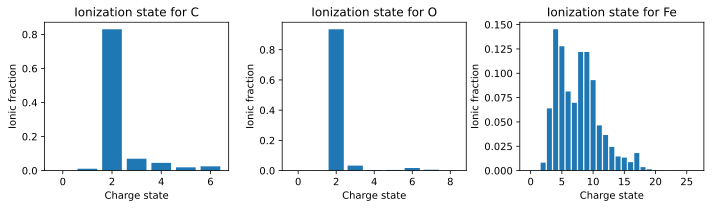

In [152]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)

for state, ax in zip(states, axes):
    ax.bar(state.charge_numbers, state.ionic_fractions)
    ax.set_title(f"Ionization state for {state.base_particle}")
    ax.set_xlabel(f"Charge state")
    ax.set_ylabel("Ionic fraction")

Does this plasma look like it all came from the same temperature?

A good first contribution to PlasmaPy would be to add methods to `IonizationState` and `IonizationStateCollection` in order to make these plots (issue #579)!

In the future, we hope to improve compatibility of `IonizationState` and `IonizationStateCollection` with data sets for spacecraft making composition measurements in the solar wind.

## PlasmaPy formulary

### Plasma beta in the solar atmosphere

Let's use [`plasmapy.formulary`](https://docs.plasmapy.org/en/stable/formulary/index.html) to calculate plasma β in different regions of the solar atmosphere.

In [86]:
from plasmapy.formulary import *

[Plasma beta]: https://en.wikipedia.org/wiki/Beta_(plasma_physics)

[Plasma beta] ($β$) is one of the most fundamental plasma parameters. $β$ is the ratio of the plasma (gas) pressure to the magnetic pressure. How a plasma behaves depends strongly on $β$. When $β ≫ 1$, the magnetic field is not strong enough to exert much of a force on the plasma, so its motions start to resemble a gas. When $β ≪ 1$, magnetic tension and pressure are the dominant macroscopic forces. 

Let's use [`beta`](https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.dimensionless.beta.html#plasmapy.formulary.dimensionless.beta) to compare $β$ in different parts of the solar atmosphere.

#### Solar corona

Let's start by defining some plasma parameters for an active region in the solar corona.

In [87]:
B_corona = 50 * u.G
n_corona = 1e9 * u.cm ** -3
T_corona = 1 * u.MK

When we use these parameters in [`beta`](https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.dimensionless.beta.html#plasmapy.formulary.dimensionless.beta), we find that $β$ is quite small so that the corona is magnetically dominated.

In [88]:
beta(T_corona, n_corona, B_corona)

<Quantity 0.00138798>

#### Solar chromosphere

Next let's calculate $β$ for the chromosphere. [Bogod et al. (2015)](https://doi.org/10.1007/s11207-014-0526-6) found that the quiet chromosphere ranges from ∼40–200 G.  We can get the temperature and number density of hydrogen from model C7 of [Avrett & Loeser (2007)](https://doi.org/10.1086/523671) for 1 Mm above the photosphere.

In [89]:
B_chromosphere = [40, 200] * u.G
T_chromosphere = 6225 * u.K
n_chromosphere = 2.711e13 * u.cm ** -3

In [90]:
beta(T_chromosphere, n_chromosphere, B_chromosphere)

<Quantity [0.36599237, 0.01463969]>

When $B$ is small, plasma $β$ is not too far from 1, which means that both magnetic and plasma pressure forces are important when the chromospheric magnetic field is relatively weak. When near the higher range of $B$, $β$ is small so that the magnetic forces are more important than plasma pressure forces.

#### Quiet solar photosphere

Let's specify some characteristic plasma parameters for the solar photosphere.

In [91]:
T_photosphere = 5800 * u.K
B_photosphere = 400 * u.G
n_photosphere = 1e17 * u.cm ** -3

When we calculate β for the photosphere, we find that it is an order of magnitude larger than 1, so plasma pressure forces are more important than magnetic tension and pressure.

In [92]:
beta(T_photosphere, n_photosphere, B_photosphere)

<Quantity 12.5785666>

#### Sunspot photosphere

The magnetic field in the solar photosphere is strongest in sunspots, so we would expect β to be lowest there. Let's estimate some plasma parameters for a sunspot.

In [93]:
T_sunspot = 4500 * u.K
B_sunspot = 2 * u.kG

When we calculate β, we find that both pressure gradient and magnetic forces will be important.

In [94]:
beta(T_sunspot, n_photosphere, B_sunspot)

<Quantity 0.39036931>

### Plasma parameters in Earth's magnetosphere

[magnetic reconnection]: https://en.wikipedia.org/wiki/Magnetic_reconnection
[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html

The [*Magnetospheric Multiscale Mission*](https://www.nasa.gov/mission_pages/mms/overview/index.html) (*MMS*) is a constellation of four identical spacecraft. The goal of *MMS* is to investigate the small-scale physics of [magnetic reconnection] in Earth's magnetosphere. In order to do this, the spacecraft need to orbit in a tight configuration.  But how tight does the tetrahedron have to be?  Let's use [`plasmapy.formulary`] to find out.

#### Physics background

Magnetic reconnection is the fundamental plasma process that converts stored magnetic energy into kinetic energy, thermal energy, and particle acceleration.  Reconnection powers solar flares and is a key component of geomagnetic storms in Earth's magnetosphere. Reconnection can also degrade confinement in fusion devices such as tokamaks. 

In the classic Sweet-Parker model, reconnection occurs when oppositely directed magnetic fields are pressed towards each other in a plasma in an elongated current sheet where they can resistively diffuse. The reconnection rate is slow because of the bottleneck associated with conservation of mass.

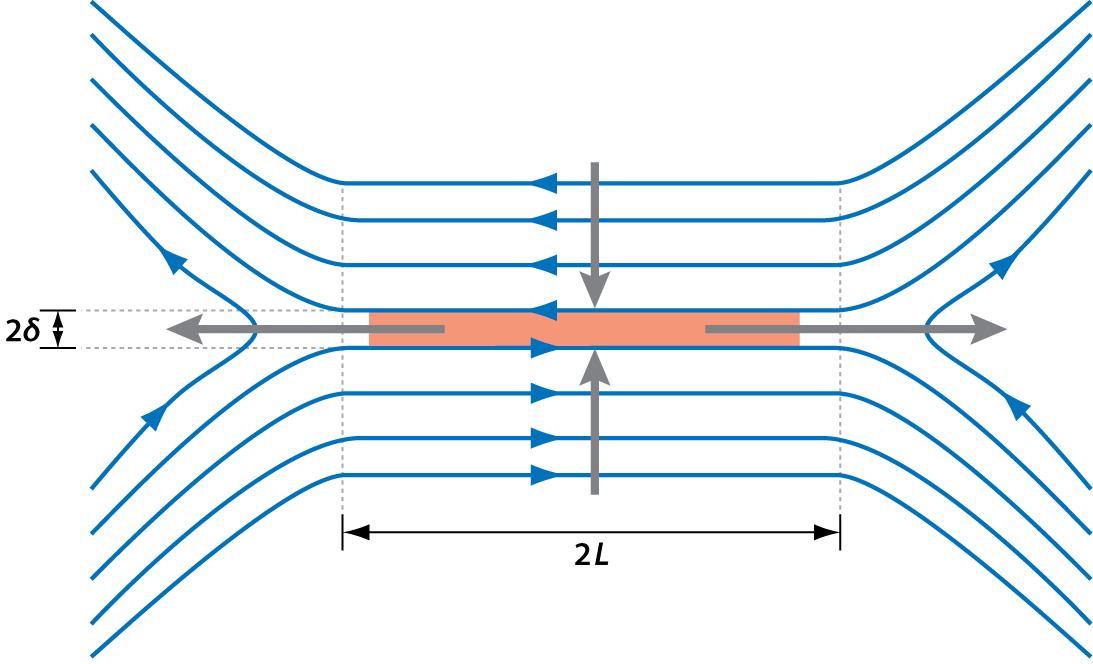

When the reconnection layer thickness is shorter than the **ion inertial length**, $d_i ≡ c/ω_{pi}$, collisionless effects and the Hall effect enable reconnection to be **fast** (Zweibel & Yamada 2009).  The inner electron diffusion region has a thickness of about the **electron inertial length**, $d_i≡c/ω_{pe}$.  

The inertial length for a particle species is the characteristic length scale for getting accelerated or decelerated by forces in a plasma.

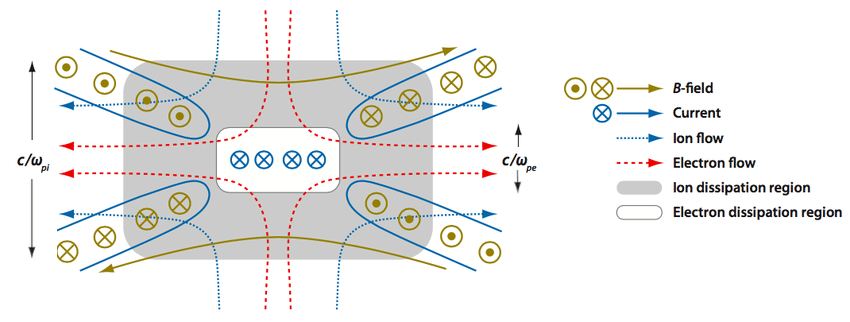

**Our goal: calculate $d_i$ and $d_e$ to get an idea of how far the MMS spacecraft should be separated from each other to investigate reconnection.**

### Length scales

Let's choose some characteristic plasma parameters for the magnetosphere.

In [95]:
n = 1 * u.cm ** -3
B = 5 * u.nT
T = 10 ** 4.5 * u.K

Let's calculate the ion inertial length, $d_i$. On length scales shorter than $d_i$, the Hall effect becomes important as the ions and electrons decouple from each other.

In [96]:
inertial_length(n, "p+").to("km")

<Quantity 227.71076725 km>

The ion diffusion regions should therefore be a few hundred kilometers thick. Let's calculate the electron inertial length next.

In [97]:
inertial_length(n, "e-").to("km")

<Quantity 5.31409326 km>

The electron diffusion region should therefore have a characteristic length scale of a few kilometers, which is significantly smaller than the ion diffusion region.

We can also calculate the gyroradii for different particles 

In [98]:
gyroradius(B, "p+", T=T).to("km")

<Quantity 47.70623395 km>

In [99]:
gyroradius(B, "e-", T=T).to("km")

<Quantity 1.11332187 km>

The four *MMS* spacecraft have separations of ten to hundreds of kilometers, and thus are well-positioned to investigate Hall physics during reconnection in the magnetosphere.

#### Frequencies

We can also calculate some of the fundamental frequencies associated with magnetospheric plasma. 

In [100]:
plasma_frequency(n, "p+")

<Quantity 1316.54932976 rad / s>

In [101]:
plasma_frequency(n, "e-")

<Quantity 56414.60231181 rad / s>

In [102]:
gyrofrequency(B, "p+")

<Quantity 0.47894166 rad / s>

In [103]:
gyrofrequency(B, "e-")

<Quantity 879.41000539 rad / s>

In [104]:
lower_hybrid_frequency(B, n, "p+")

<Quantity 20.52032563 rad / s>

### 1D Maxwellian distribution function

[`Maxwellian_1D`]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.distribution.Maxwellian_1D.html

Next let's try out [`Maxwellian_1D`], also from `plasmapy.formulary`.

As a first example, let's get the probability density of
finding an electron with a speed of 1 m/s if we have a
plasma at a temperature of 30 000 K:



In [157]:
p_dens = Maxwellian_1D(
    v=1000000 * u.m / u.s, T=30000 * u.K, particle="e", v_drift=0 * u.m / u.s
)
print(p_dens)

1.9700642291323893e-07 s / m


Note the units! Integrated over speed, this will give us a probability. Let's test that for a bunch of particles:

In [107]:
T = 3e4 * u.K
dv = 10 * u.m / u.s
v = np.arange(-5e6, 5e6, 10) * u.m / u.s

Let's check that the integral over all speeds is 1.

Integral value for p: 1.0000000000000002
Integral value for e: 0.9999999999998787


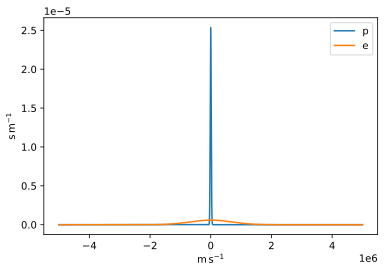

In [108]:
for particle in ["p", "e"]:
    pdf = Maxwellian_1D(v, T=T, particle=particle)
    integral = (pdf).sum() * dv
    print(f"Integral value for {particle}: {integral}")
    plt.plot(v, pdf, label=particle)
plt.legend()

The standard deviation of this distribution should give us back the
temperature:



In [109]:
std = np.sqrt((Maxwellian_1D(v, T=T, particle="e") * v ** 2 * dv).sum())
T_theo = (std ** 2 / const.k_B * const.m_e).to(u.K)

print("T from standard deviation:", T_theo)
print("Initial T:", T)

T from standard deviation: 29999.999999792235 K
Initial T: 30000.0 K


## Thermal Speed

[thermal_speed]: ../../api/plasmapy.formulary.speeds.thermal_speed.rst#plasmapy.formulary.speeds.thermal_speed

The [thermal_speed] function can be used to calculate the thermal velocity for a Maxwellian velocity distribution. There are three common definitions of the thermal velocity, which can be selected using the "method" keyword, which are defined for a 3D velocity distribution as

- 'most_probable' <br>
$v_{th} = \sqrt{\frac{2 k_B T}{m}}$

- 'rms' <br>
$v_{th} = \sqrt{\frac{3 k_B T}{m}}$

- 'mean_magnitude' <br>
$v_{th} = \sqrt{\frac{8 k_B T}{m\pi}}$

The differences between these velocities can be seen by plotitng them on a 3D Maxwellian speed distribution

In [110]:
T = 1e5 * u.K
speeds = np.linspace(0, 8e6, num=600) * u.m / u.s

pdf_3D = Maxwellian_speed_3D(speeds, T=T, particle="e-")

In [111]:
v_most_prob = thermal_speed(T=T, particle="e-", method="most_probable", ndim=3)
v_rms = thermal_speed(T=T, particle="e-", method="rms", ndim=3)
v_mean_magnitude = thermal_speed(T=T, particle="e-", method="mean_magnitude", ndim=3)

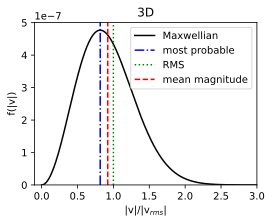

In [112]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(speeds / v_rms, pdf_3D, color="black", label="Maxwellian")

ax.axvline(x=v_most_prob / v_rms, color="blue", linestyle="-.", label="most probable")
ax.axvline(x=v_rms / v_rms, color="green", linestyle=":", label="RMS")
ax.axvline(x=v_mean_magnitude / v_rms, color="red", linestyle="--", label="mean magnitude")

ax.set_xlim(-0.1, 3)
ax.set_ylim(0, None)
ax.set_title("3D")
ax.set_xlabel("|v|/|v$_{rms}|$")
ax.set_ylabel("f(|v|)")
ax.legend()

plt.show()

Similar speeds are defined for 1D and 2D distributions. The differences between these definitions can be illustrated by plotting them on their respective Maxwellian speed distributions.

In [113]:
pdf_1D = Maxwellian_speed_1D(speeds, T=T, particle="e-")
pdf_2D = Maxwellian_speed_2D(speeds, T=T, particle="e-")

<Figure size 432x288 with 0 Axes>

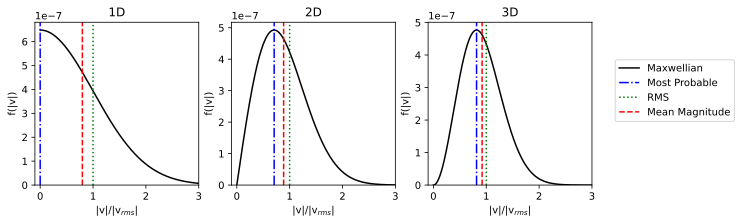

In [114]:
dim = [1, 2, 3]
pdfs = [pdf_1D, pdf_2D, pdf_3D]

plt.tight_layout()
fig, ax = plt.subplots(ncols=3, figsize=(10, 3))

for n, pdf in enumerate(pdfs):
    ndim = n + 1
    v_most_prob = thermal_speed(T=T, particle="e-", method="most_probable", ndim=ndim)
    v_rms = thermal_speed(T=T, particle="e-", method="rms", ndim=ndim)
    v_mean_magnitude = thermal_speed(
        T=T, particle="e-", method="mean_magnitude", ndim=ndim
    )

    ax[n].plot(speeds / v_rms, pdf, color="black", label="Maxwellian")

    ax[n].axvline(x=v_most_prob / v_rms, color="blue", linestyle="-.",label="Most Probable")
    ax[n].axvline(x=v_rms / v_rms, color="green", linestyle=":", label="RMS")
    ax[n].axvline(x=v_mean_magnitude / v_rms, color="red", linestyle="--", label="Mean Magnitude")

    ax[n].set_xlim(-0.1, 3)
    ax[n].set_ylim(0, None)
    ax[n].set_title("{:d}D".format(ndim))
    ax[n].set_xlabel("|v|/|v$_{rms}|$")
    ax[n].set_ylabel("f(|v|)")


ax[2].legend(bbox_to_anchor=(1.9, 0.8), loc="upper right")

## Coulomb logarithms

Coulomb collisions are collisions between two charged particles where the interaction is governed solely by the electric field. Coulomb collisions are occur much more frequently than head-on collisions.  Coulomb collisions usually result in small deflections in particle trajectories. The deflection angle depends on the distance between the two particles.

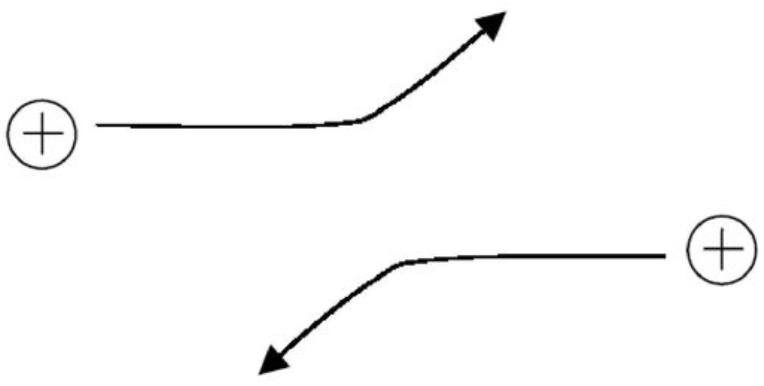

[impact parameters]: https://en.wikipedia.org/wiki/Impact_parameter
[Debye length]: https://en.wikipedia.org/wiki/Debye_length

Coulomb collisions in a plasma occur at a range of [impact parameters].  The minimum and maximum impact parameters ($b_\min$ and $b_\max$, respectively) represent the range of distances of closest approach. While a typical Coulomb collision results in only a slight change in trajectory, the effects of these collisions are cumulative, and it is necessary to integrate over the range of impact parameters. The Coulomb logarithm accounts for the range in impact parameters, and is given by $$\ln{Λ} ≡ \ln\left(\frac{b_\max}{b_\min}\right).$$ 
But what should we use for the impact parameters?

Usually $b_\max$ is given by the [Debye length], $λ_D$. On length scales $≳ λ_D$, electrons will rearrange themselves so that electric fields from individual particles get cancelled out. Consequently, Coulomb collisions with impact parameters $≳ λ_D$ will rarely occur. 

The inner impact parameter $b_\min$ is more controversial. One possibility would be to set $b_\min$ to be the impact parameter corresponding to a 90° deflection angle, $ρ_⟂$, which can be calculated with `impact_parameter_perp`.  Alternatively, $b_\min$ could be set to be the de Broglie wavelength, $λ_{dB}$, which can be calculated with `deBroglie_wavelength`. Typically, $$b_\min = \max\left\{ρ_⟂, λ_{dB} \right\}.$$

The `impact_parameter` function in `plasmapy.formulary` simultaneously calculates both $b_\min$ and $b_\max$. Let's estimate $b_\min$ and $b_\max$ for proton-electron collisions in the solar corona.

In [115]:
T = 1e6 * u.K
n_e = 1e15 * u.m ** -3
species = ["e-", "p+"]

impact_parameter(T, n_e, species)

(<Quantity 1.05163071e-11 m>, <Quantity 0.00218226 m>)

When we can calculate the Coulomb logarithm, we find that it is ∼20 (a common value for astrophysical plasma).

In [116]:
Coulomb_logarithm(T, n_e, species)

19.150697742645406

Let's look at how the Coulomb logarithm varies over temperature in a high density plasma.

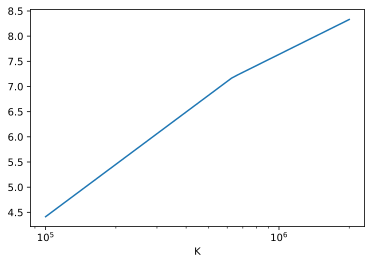

In [117]:
n_e = 1e25 * u.m ** -3
T = np.geomspace(1e5, 2e6) * u.K

log_Lambda = Coulomb_logarithm(T, n_e, species)

plt.semilogx(T, log_Lambda)

At low temperatures, $b_\min$ is $ρ_⟂$. At higher temperatures, $b_\min$ is $λ_{dB}$. What happens if we look at lower temperatures?

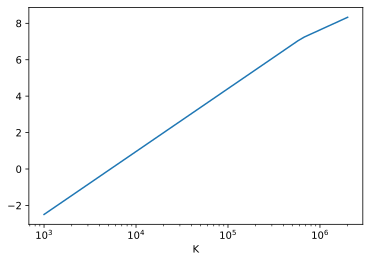

In [118]:
T = np.geomspace(1e3, 2e6) * u.K

log_Lambda = Coulomb_logarithm(T, n_e, species)

plt.semilogx(T, log_Lambda)

The Coulomb logarithm becomes negative! 🙀  This unphysical situation occurs because $b_\min > b_\max$.

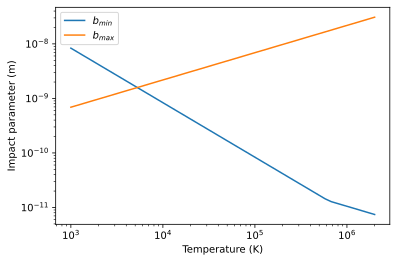

In [119]:
bmin, bmax = impact_parameter(T, n_e, species)

plt.loglog(T, bmin, label="$b_{min}$")
plt.loglog(T, bmax, label="$b_{max}$")
plt.xlabel("Temperature (K)")
plt.ylabel("Impact parameter (m)")
plt.legend()
plt.show()

So how to we handle this?  Fortunately, PlasmaPy's implementation of `Coulomb_logarithm` includes the methods described by Gericke, Murillo, and Schlanges (2002) for dense, strongly-coupled plasmas.  For most cases, we recommend using `method="GMS-6"`.

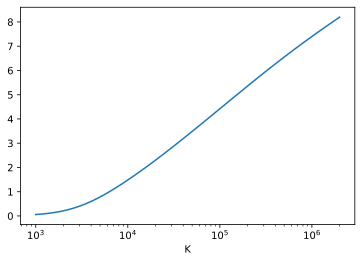

In [120]:
T = np.geomspace(1e3, 2e6) * u.K

log_Λ = Coulomb_logarithm(T, n_e, species, z_mean=1, method="GMS-6")

plt.semilogx(T, log_Λ)

In the above plot, the Coulomb logarithm approaches zero as the temperature decreases, and does not become unphysically negative.  We can also calculate the collision frequency for different Coulomb interactions.

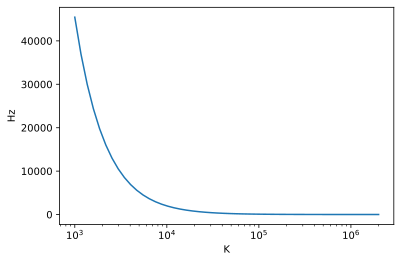

In [121]:
n = 1e15 * u.m ** -3

cf_p_p = collision_frequency(T, n, ["p+", "p+"])

plt.semilogx(T, cf_p_p)

## Emission of Thermal Bremsstrahlung by a Maxwellian Plasma

[`thermal_bremsstrahlung`]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.radiation.thermal_bremsstrahlung.html#thermal-bremsstrahlung

The [`thermal_bremsstrahlung`] function calculates the bremsstrahlung spectrum emitted by the collision of electrons and ions in a thermal (Maxwellian) plasma. This function calculates this quantity in the Rayleigh-Jeans limit where $\hbar\omega \ll k_B T_e$.

 Let's start by setting the plasma density, temperature, and ion species.

In [122]:
ne = 1e22 * u.cm ** -3
Te = 1e2 * u.eV
ion_species = "C-12 4+"

Let's create an array of frequencies over which to calculate the bremsstrahlung spectrum and convert these frequencies to photon energies for the purpose of plotting the results.

In [123]:
frequencies = np.arange(15, 16, 0.01)
frequencies = (10 ** frequencies) / u.s

energies = (frequencies * const.h.si).to(u.eV)

Calculate the spectrum, then plot it.

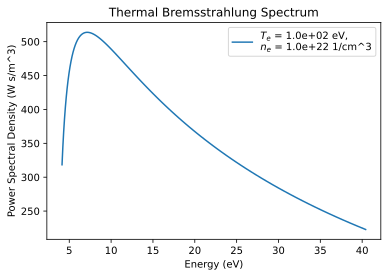

In [124]:
from plasmapy.formulary.radiation import *

spectrum = thermal_bremsstrahlung(frequencies, ne, Te, ion_species=ion_species)

lbl = "$T_e$ = {:.1e} eV,\n".format(Te.value) + "$n_e$ = {:.1e} 1/cm^3".format(ne.value)
plt.plot(energies, spectrum, label=lbl)
plt.title(f"Thermal Bremsstrahlung Spectrum")
plt.xlabel("Energy (eV)")
plt.ylabel("Power Spectral Density (W s/m^3)")
plt.legend()
plt.show()

The power spectrum is the power per angular frequency per volume integrated over $4\pi$ sr of solid angle, and therefore has units of W·s/m$^3$.

In [125]:
spectrum = spectrum.to(u.W * u.s / u.m ** 3)
spectrum.unit

Unit("s W / m3")

This means that, for a given volume and time period, the total energy emitted can be determined by integrating the power spectrum

In [126]:
t = 5 * u.ns
vol = 0.5 * u.cm ** 3
dw = 2 * np.pi * np.gradient(frequencies)  # Frequency step size
total_energy = (np.sum(spectrum * dw) * t * vol).to(u.J)
print("Total Energy: {:.2e} J".format(total_energy.value))

Total Energy: 4.97e+04 J



## Magnetostatic Fields

An example of using PlasmaPy's `Magnetostatic` class in `formulary` subpackage.


In [127]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np



Some common magnetostatic fields can be generated and added to a plasma object.
A dipole



In [128]:
dipole = magnetostatics.MagneticDipole(
    np.array([0, 0, 1]) * u.A * u.m * u.m, np.array([0, 0, 0]) * u.m
)
print(dipole)

MagneticDipole(moment=[0. 0. 1.]A m2, p0=[0. 0. 0.]m)


Initialize a plasma, where the magnetic field will be calculated on.

In [129]:
plasma = Plasma3D(
    domain_x=np.linspace(-2, 2, 30) * u.m,
    domain_y=np.linspace(0, 0, 1) * u.m,
    domain_z=np.linspace(-2, 2, 20) * u.m,
)

add the dipole field to it



In [130]:
plasma.add_magnetostatic(dipole)

X, Z = plasma.grid[0, :, 0, :], plasma.grid[2, :, 0, :]
U = plasma.magnetic_field[0, :, 0, :].value.T  # because grid uses 'ij' indexing
W = plasma.magnetic_field[2, :, 0, :].value.T  # because grid uses 'ij' indexing

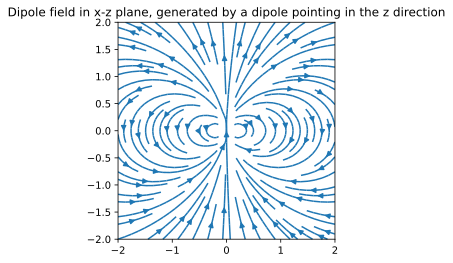

In [131]:
plt.figure()
plt.axis("square")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title(
    "Dipole field in x-z plane, generated by a dipole pointing in the z direction"
)
plt.streamplot(plasma.x.value, plasma.z.value, U, W)

A circular current-carring wire (:class:`~plasmapy.formulary.magnetostatics.CircularWire`)

In [132]:
cw = magnetostatics.CircularWire(
    np.array([0, 0, 1]), np.array([0, 0, 0]) * u.m, 1 * u.m, 1 * u.A
)
print(cw)

CircularWire(normal=[0. 0. 1.], center=[0. 0. 0.]m, radius=1.0m, current=1.0A)


initialize a plasma, where the magnetic field will be calculated on



In [133]:
plasma = Plasma3D(
    domain_x=np.linspace(-2, 2, 30) * u.m,
    domain_y=np.linspace(0, 0, 1) * u.m,
    domain_z=np.linspace(-2, 2, 20) * u.m,
)

add the circular coil field to it



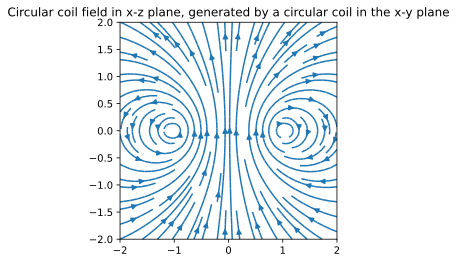

In [134]:
plasma.add_magnetostatic(cw)

X, Z = plasma.grid[0, :, 0, :], plasma.grid[2, :, 0, :]
U = plasma.magnetic_field[0, :, 0, :].value.T  # because grid uses 'ij' indexing
W = plasma.magnetic_field[2, :, 0, :].value.T  # because grid uses 'ij' indexing

plt.figure()
plt.axis("square")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title(
    "Circular coil field in x-z plane, generated by a circular coil in the x-y plane"
)
plt.streamplot(plasma.x.value, plasma.z.value, U, W)

In [135]:
gw_cw = cw.to_GeneralWire()

# the calculated magnetic field is close
print(gw_cw.magnetic_field([0, 0, 0]) - cw.magnetic_field([0, 0, 0]))

[ 0.00000000e+00  0.00000000e+00 -4.13416205e-12] T


In [136]:
iw = magnetostatics.InfiniteStraightWire(
    np.array([0, 1, 0]), np.array([0, 0, 0]) * u.m, 1 * u.A
)
print(iw)

InfiniteStraightWire(direction=[0. 1. 0.], p0=[0. 0. 0.]m, current=1.0A)


initialize a a plasma, where the magnetic field will be calculated on



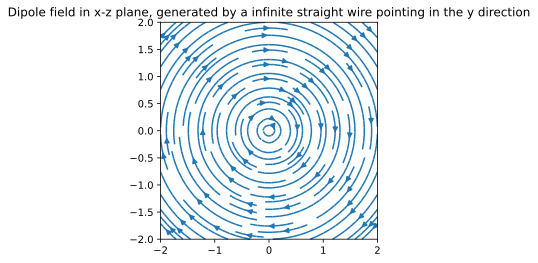

In [137]:
plasma = Plasma3D(
    domain_x=np.linspace(-2, 2, 30) * u.m,
    domain_y=np.linspace(0, 0, 1) * u.m,
    domain_z=np.linspace(-2, 2, 20) * u.m,
)

# add the infinite straight wire field to it
plasma.add_magnetostatic(iw)

X, Z = plasma.grid[0, :, 0, :], plasma.grid[2, :, 0, :]
U = plasma.magnetic_field[0, :, 0, :].value.T  # because grid uses 'ij' indexing
W = plasma.magnetic_field[2, :, 0, :].value.T  # because grid uses 'ij' indexing

plt.figure()
plt.title(
    "Dipole field in x-z plane, generated by a infinite straight wire "
    "pointing in the y direction"
)
plt.axis("square")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.streamplot(plasma.x.value, plasma.z.value, U, W)


## Braginskii coefficients

A short example of how to calculate classical transport coefficients
from Bragiński's theory.


In [138]:
from astropy import units as u

from plasmapy.formulary import ClassicalTransport

We'll use some sample ITER data, without much regard for whether
the regime is even fit for classical transport theory:



In [139]:
thermal_energy_per_electron = 8.8 * u.keV
electron_concentration = 10.1e19 / u.m ** 3

thermal_energy_per_ion = 8.0 * u.keV
ion_concentration = electron_concentration
ion = "D+"  # a crude approximation

In [140]:
braginskii = ClassicalTransport(
    thermal_energy_per_electron,
    electron_concentration,
    thermal_energy_per_ion,
    ion_concentration,
    ion,
)

These variables are calculated during initialization and can be
referred to straight away:



In [141]:
print(braginskii.coulomb_log_ei)
print(braginskii.coulomb_log_ii)
print(braginskii.hall_e)
print(braginskii.hall_i)

18.015542112815666
20.41557520752423
0.0
0.0


These quantities are not calculated during initialization and can be
referred to via methods. To signify the need to calculate them, we
call them via ().



In [142]:
print(braginskii.resistivity)
print(braginskii.thermoelectric_conductivity)
print(braginskii.electron_thermal_conductivity)
print(braginskii.ion_thermal_conductivity)

1.1541382845331304e-09 m Ohm
0.7110839986207994
1065176076.6192665 W / (K m)
21360464.463766705 W / (K m)


They also change with magnetization:



In [143]:
mag_braginskii = ClassicalTransport(
    thermal_energy_per_electron,
    electron_concentration,
    thermal_energy_per_ion,
    ion_concentration,
    ion,
    B=0.1 * u.T,
)

print(mag_braginskii.resistivity)
print(mag_braginskii.thermoelectric_conductivity)
print(mag_braginskii.electron_thermal_conductivity)
print(mag_braginskii.ion_thermal_conductivity)

1.1541382845331304e-09 m Ohm
0.7110839986207994
1065176076.6192665 W / (K m)
21360464.463766705 W / (K m)


In [144]:
all_direction_braginskii = ClassicalTransport(
    thermal_energy_per_electron,
    electron_concentration,
    thermal_energy_per_ion,
    ion_concentration,
    ion,
    B=0.1 * u.T,
    field_orientation="all",
)

print(all_direction_braginskii.resistivity)
print(all_direction_braginskii.thermoelectric_conductivity)
print(all_direction_braginskii.electron_thermal_conductivity)
print(all_direction_braginskii.ion_thermal_conductivity)

[1.15413828e-09 2.25078755e-09 1.39690568e-15] m Ohm
[7.11083999e-01 6.76676822e-13 5.46328992e-07]
[1.06517608e+09 2.08451764e-04 3.06777888e+02] W / (K m)
[2.13604645e+07 4.24754851e-03 2.69422221e+02] W / (K m)


The viscosities return arrays:



In [145]:
print(braginskii.electron_viscosity)
print(mag_braginskii.electron_viscosity)
print(braginskii.ion_viscosity)
print(mag_braginskii.ion_viscosity)

[16.29411376 16.28874805 16.28874805  0.          0.        ] Pa s
[1.62941138e+01 2.00480711e-25 8.01922844e-25 1.47442522e-12
 2.94885044e-12] Pa s
[1271.38945503 1267.52435833 1267.52435833    0.            0.        ] Pa s
[1.27138946e+03 5.99222933e-17 2.39689173e-16 2.57162285e-07
 5.14324570e-07] Pa s


## Dispersion: A Full Two Fluid Solution

[tfds]: ../../api/plasmapy.dispersion.analytical.two_fluid_.two_fluid.rst
[bellan2012]: https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2012JA017856
[stringer1963]: https://doi.org/10.1088/0368-3281/5/2/304

This notebook walks through the functionality of the [two_fluid()][tfds] function.  This function computes the wave frequencies for given wavenumbers and plasma parameters based on the analytical solution presented by [Bellan 2012][bellan2012] to the [Stringer 1963][stringer1963] two fluid dispersion relation.  The two fluid dispersion equaiton assumes a uniform magnetic field, a zero D.C. electric field, and low-frequency waves $\omega / k c \ll 1$ which equates to

$$
    \left( \cos^2 \theta - Q \frac{\omega^2}{k^2 {v_A}^2} \right)
    \left[
        \left( \cos^2 \theta - \frac{\omega^2}{k^2 {c_s}^2} \right)
        - Q \frac{\omega^2}{k^2 {v_A}^2} \left(
            1 - \frac{\omega^2}{k^2 {c_s}^2}
        \right)
    \right] \\
    = \left(1 - \frac{\omega^2}{k^2 {c_s}^2} \right)
      \frac{\omega^2}{{\omega_{ci}}^2} \cos^2 \theta
$$

where

$$Q = 1 + k^2 c^2/{\omega_{pe}}^2$$

$$\cos \theta = \frac{k_z}{k}$$

$$\mathbf{B_o} = B_{o} \mathbf{\hat{z}}$$

$\omega$ is the wave frequency, $k$ is the wavenumber, $v_A$ is the Alfvén velocity, $c_s$ is the sound speed, $\omega_{ci}$ is the ion gyrofrequency, and $\omega_{pe}$ is the electron plasma frequency.

The approach outlined in Section 5 of [Bellan 2012][bellan2012] produces exact roots to the above dispersion equation for all three modes (fast, acoustic, and Alfvén) without having to make additional approximations.  The following dispersion relation is what the [two_fluid()][tfds] function computes.

$$
    \frac{\omega}{\omega_{ci}} = \sqrt{
        2 \Lambda \sqrt{-\frac{P}{3}} \cos\left(
            \frac{1}{3} \cos^{-1}\left(
                \frac{3q}{2p} \sqrt{-\frac{3}{p}}
            \right)
            - \frac{2 \pi}{3}j
        \right)
        + \frac{\Lambda A}{3}
    }
$$

where $j = 0$ represents the fast mode, $j = 1$ represents the Alfvén mode, and $j = 2$ represents the acoustic mode.  Additionally,

$$p = \frac{3B-A^2}{3} \; , \; q = \frac{9AB-2A^3-27C}{27}$$

$$A = \frac{Q + Q^2 \beta + Q \alpha + \alpha \Lambda}{Q^2} \;
    , \; B = \alpha \frac{1 + 2 Q \beta + \Lambda \beta}{Q^2} \;
    , \; C = \frac{\alpha^2 \beta}{Q^2}$$

$$\alpha = \cos^2 \theta \;
    , \; \beta = \left( \frac{c_s}{v_A}\right)^2 \;
    , \; \Lambda = \left( \frac{k v_{A}}{\omega_{ci}}\right)^2$$

### Contents:

1. [Wave Propagating at 45 Degrees](#Wave-Propagating-at-45-Degrees)
2. [Wave frequencies on the k-theta plane](#Wave-frequencies-on-the-k-theta-plane)
3. [Reproduce Figure 1 from Bellan 2012](#Reproduce-Figure-1-from-Bellan-2012)

In [146]:

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from astropy.constants.si import c
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

from plasmapy.dispersion.analytical.two_fluid_ import two_fluid
from plasmapy.formulary import speeds
from plasmapy.formulary.frequencies import gyrofrequency, plasma_frequency, wc_, wp_
from plasmapy.formulary.lengths import inertial_length
from plasmapy.particles import Particle

plt.rcParams["figure.figsize"] = [10.5, 0.56 * 10.5]

ImportError: cannot import name 'speeds' from 'plasmapy.formulary' (/home/namurphy/.miniconda/lib/python3.9/site-packages/plasmapy/formulary/__init__.py)

### Wave Propagating at 45 Degrees

Below we define the required parameters to compute the wave frequencies.

In [ ]:
# define input parameters
inputs = {
    "k": np.linspace(10 ** -7, 10 ** -2, 10000) * u.rad / u.m,
    "theta": 45 * u.deg,
    "n_i": 5 * u.cm ** -3,
    "B": 8.3e-9 * u.T,
    "T_e": 1.6e6 * u.K,
    "T_i": 4.0e5 * u.K,
    "ion": Particle("p+"),
}

# a few useful plasma parameters
params = {
    "n_e": inputs["n_i"] * abs(inputs["ion"].charge_number),
    "cs": speeds.ion_sound_speed(
        inputs["T_e"],
        inputs["T_i"],
        inputs["ion"],
    ),
    "va": speeds.Alfven_speed(
        inputs["B"],
        inputs["n_i"],
        ion=inputs["ion"],
    ),
    "wci": gyrofrequency(inputs["B"], inputs["ion"]),
}
params["lpe"] = inertial_length(params["n_e"], "e-")
params["wpe"] = plasma_frequency(params["n_e"], "e-")

The computed wave frequencies ($rad/s$) are returned in a dictionary with keys representing the wave modes and the values being an Astropy [Quantity](https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity).  Since our inputs had a scalar $\theta$ and a 1D array of $k$'s, the computed wave frequencies will be a 1D array of size equal to the size of the $k$ array.

In [ ]:
# compute
omegas = two_fluid(**inputs)

(list(omegas.keys()), omegas["fast_mode"], omegas["fast_mode"].shape)

Let's plot the results of each wave mode.

In [ ]:
fs = 14  # default font size
figwidth, figheight = plt.rcParams["figure.figsize"]
figheight = 1.6 * figheight
fig = plt.figure(figsize=[figwidth, figheight])

# normalize data
k_prime = inputs["k"] * params["lpe"]

# plot
plt.plot(
    k_prime,
    np.real(omegas["fast_mode"] / params["wpe"]),
    "r.",
    ms=1,
    label="Fast",
)
ax = plt.gca()
ax.plot(
    k_prime,
    np.real(omegas["alfven_mode"] / params["wpe"]),
    "b.",
    ms=1,
    label="Alfvèn",
)
ax.plot(
    k_prime,
    np.real(omegas["acoustic_mode"] / params["wpe"]),
    "g.",
    ms=1,
    label="Acoustic",
)

# adjust axes
ax.set_xlabel(r"$kc / \omega_{pe}$", fontsize=fs)
ax.set_ylabel(r"$Re(\omega / \omega_{pe})$", fontsize=fs)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(1e-6, 2e-2)
ax.tick_params(
    which="both",
    direction="in",
    width=1,
    labelsize=fs,
    right=True,
    length=5,
)

# annotate
text = (
    f"$v_A/c_s = {params['va'] / params['cs']:.1f} \qquad "
    f"c/v_A = 10^{np.log10(const.c / params['va']):.0f} \qquad "
    f"\\theta = {inputs['theta'].value:.0f}"
    "^{\\circ}$"
)
ax.text(0.25, 0.95, text, transform=ax.transAxes, fontsize=18)
ax.legend(loc="upper left", markerscale=5, fontsize=fs)

### Wave frequencies on the k-theta plane

Let us now look at the distribution of $\omega$ on a $k$-$\theta$ plane.

In [ ]:
# define input parameters
inputs = {
    "k": np.linspace(10 ** -7, 10 ** -2, 10000) * u.rad / u.m,
    "theta": np.linspace(5, 85, 100) * u.deg,
    "n_i": 5 * u.cm ** -3,
    "B": 8.3e-9 * u.T,
    "T_e": 1.6e6 * u.K,
    "T_i": 4.0e5 * u.K,
    "ion": Particle("p+"),
}

# a few useful plasma parameters
params = {
    "n_e": inputs["n_i"] * abs(inputs["ion"].charge_number),
    "cs": speeds.ion_sound_speed(
        inputs["T_e"],
        inputs["T_i"],
        inputs["ion"],
    ),
    "va": speeds.Alfven_speed(
        inputs["B"],
        inputs["n_i"],
        ion=inputs["ion"],
    ),
    "wci": gyrofrequency(inputs["B"], inputs["ion"]),
}
params["lpe"] = inertial_length(params["n_e"], "e-")
params["wpe"] = plasma_frequency(params["n_e"], "e-")

Since the $\theta$ and $k$ values are now 1-D arrays, the returned wave frequencies will be 2-D arrays with the first dimension matching the size of $k$ and the second dimension matching the size of $\theta$.

In [ ]:
# compute
omegas = two_fluid(**inputs)

(
    omegas["fast_mode"].shape,
    omegas["fast_mode"].shape[0] == inputs["k"].size,
    omegas["fast_mode"].shape[1] == inputs["theta"].size,
)

Let's plot (the fast mode)!

In [ ]:
fs = 14  # default font size
figwidth, figheight = plt.rcParams["figure.figsize"]
figheight = 1.6 * figheight
fig = plt.figure(figsize=[figwidth, figheight])

# normalize data
k_prime = inputs["k"] * params["lpe"]
zdata = np.transpose(np.real(omegas["fast_mode"].value)) / params["wpe"].value

# plot
im = plt.imshow(
    zdata,
    aspect="auto",
    origin="lower",
    extent=[
        np.min(k_prime.value),
        np.max(k_prime.value),
        np.min(inputs["theta"].value),
        np.max(inputs["theta"].value),
    ],
    interpolation=None,
    cmap=plt.cm.Spectral,
)
ax = plt.gca()

# # adjust axes
ax.set_xscale("linear")
ax.set_xlabel(r"$kc/\omega_{pe}$", fontsize=fs)
ax.set_ylabel(r"$\theta$ [$deg.$]", fontsize=fs)
ax.tick_params(
    which="both",
    direction="in",
    width=2,
    labelsize=fs,
    right=True,
    top=True,
    length=10,
)

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.07)
cbar = plt.colorbar(
    im,
    cax=cax,
    orientation="horizontal",
    ticks=None,
    fraction=0.05,
    pad=0.0,
)
cbar.ax.tick_params(
    axis="x",
    direction="in",
    width=2,
    length=10,
    top=True,
    bottom=False,
    labelsize=fs,
    pad=0.0,
    labeltop=True,
    labelbottom=False,
)
cbar.ax.xaxis.set_label_position("top")
cbar.set_label(r"$\omega/\omega_{pe}$", fontsize=fs, labelpad=8)

### Reproduce Figure 1 from Bellan 2012

[bellan2012]: https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2012JA017856


Figure 1 of [Bellan 2012][bellan2012] chooses parameters such that $\beta = 0.4$ and $\Lambda=0.4$.  Below we define parameters to approximate Bellan's assumptions.

In [ ]:
# define input parameters
inputs = {
    "B": 400e-4 * u.T,
    "ion": Particle("He+"),
    "n_i": 6.358e19 * u.m ** -3,
    "T_e": 20 * u.eV,
    "T_i": 10 * u.eV,
    "theta": np.linspace(0, 90) * u.deg,
    "k": (2 * np.pi * u.rad) / (0.56547 * u.m),
}

# a few useful plasma parameters
params = {
    "n_e": inputs["n_i"] * abs(inputs["ion"].charge_number),
    "cs": speeds.cs_(inputs["T_e"], inputs["T_i"], inputs["ion"]),
    "wci": wc_(inputs["B"], inputs["ion"]),
    "va": speeds.va_(inputs["B"], inputs["n_i"], ion=inputs["ion"]),
}
params["beta"] = (params["cs"] / params["va"]).value ** 2
params["wpe"] = wp_(params["n_e"], "e-")
params["Lambda"] = (inputs["k"] * params["va"] / params["wci"]).value ** 2

(params["beta"], params["Lambda"])

In [ ]:
# compute
omegas = two_fluid(**inputs)

In [ ]:
# generate data for plots
plt_vals = {}
for mode, arr in omegas.items():
    norm = (np.absolute(arr) / (inputs["k"] * params["va"])).value ** 2
    plt_vals[mode] = {
        "x": norm * np.sin(inputs["theta"].to(u.rad).value),
        "y": norm * np.cos(inputs["theta"].to(u.rad).value),
    }

In [ ]:
fs = 14  # default font size
figwidth, figheight = plt.rcParams["figure.figsize"]
figheight = 1.6 * figheight
fig = plt.figure(figsize=[figwidth, figheight])

# Fast mode
plt.plot(
    plt_vals["fast_mode"]["x"],
    plt_vals["fast_mode"]["y"],
    linewidth=2,
    label="Fast",
)
ax = plt.gca()

# adjust axes
ax.set_xlabel(r"$(\omega / k v_A)^2 \, \sin \theta$", fontsize=fs)
ax.set_ylabel(r"$(\omega / k v_A)^2 \, \cos \theta$", fontsize=fs)
ax.set_xlim(0.0, 1.5)
ax.set_ylim(0.0, 2.0)
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.minorticks_on()
ax.tick_params(which="both", labelsize=fs, width=2)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", length=5)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))


# Alfven mode
plt.plot(
    plt_vals["alfven_mode"]["x"],
    plt_vals["alfven_mode"]["y"],
    linewidth=2,
    label="Alfv$\`{e}$n",
)

# Acoustic mode
plt.plot(
    plt_vals["acoustic_mode"]["x"],
    plt_vals["acoustic_mode"]["y"],
    linewidth=2,
    label="Acoustic",
)

# annotations
plt.legend(fontsize=fs, loc="upper right")

In [ ]:
%matplotlib inline


## The plasma dispersion function

Let's import some basics (and `PlasmaPy`!)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import plasmapy.dispersion.dispersionfunction

help(plasmapy.dispersion.dispersionfunction.plasma_dispersion_func)

We'll now make some sample data to visualize the dispersion function:



In [ ]:
x = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, x)
Z = X + 1j * Y
print(Z.shape)

Before we start plotting, let's make a visualization function first:



In [ ]:
def plot_complex(X, Y, Z, N=50):
    fig, (real_axis, imag_axis) = plt.subplots(1, 2)
    real_axis.contourf(X, Y, Z.real, N)
    imag_axis.contourf(X, Y, Z.imag, N)
    real_axis.set_title("Real values")
    imag_axis.set_title("Imaginary values")
    for ax in [real_axis, imag_axis]:
        ax.set_xlabel("Real values")
        ax.set_ylabel("Imaginary values")
    fig.tight_layout()


plot_complex(X, Y, Z)

We can now apply our visualization function to our simple dispersion relation



In [ ]:
# sphinx_gallery_thumbnail_number = 2
F = plasmapy.dispersion.dispersionfunction.plasma_dispersion_func(Z)
plot_complex(X, Y, F)

So this is going to be a hack and I'm not 100% sure the dispersion function
is quite what I think it is, but let's find the area where the dispersion
function has a lesser than zero real part because I think it may be important
(brb reading Fried and Conte):



In [ ]:
plot_complex(X, Y, F.real < 0)

We can also visualize the derivative:



In [ ]:
F = plasmapy.dispersion.dispersionfunction.plasma_dispersion_func_deriv(Z)
plot_complex(X, Y, F)

Plotting the same function on a larger area:



In [ ]:
x = np.linspace(-2, 2, 2000)
X, Y = np.meshgrid(x, x)
Z = X + 1j * Y
print(Z.shape)

In [ ]:
F = plasmapy.dispersion.dispersionfunction.plasma_dispersion_func(Z)
plot_complex(X, Y, F, 100)

Now we examine the derivative of the dispersion function as a function
of the phase velocity of an electromagnetic wave propagating through
the plasma. This is recreating figure 5.1 in:
J. Sheffield, D. Froula, S. H. Glenzer, and N. C. Luhmann Jr,
Plasma scattering of electromagnetic radiation: theory and measurement
techniques. Chapter 5 Pg 106 (Academic press, 2010).



In [ ]:
xs = np.linspace(0, 4, 100)
ws = (-1 / 2) * plasmapy.dispersion.dispersionfunction.plasma_dispersion_func_deriv(xs)
wRe = np.real(ws)
wIm = np.imag(ws)

plt.plot(xs, wRe, label="Re")
plt.plot(xs, wIm, label="Im")
plt.axis([0, 4, -0.3, 1])
plt.legend(
    loc="upper right", frameon=False, labelspacing=0.001, fontsize=14, borderaxespad=0.1
)
plt.show()